# Kilian COLLET ####

# TP 2 ####

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import svm, datasets, tree
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

### I. Apprentissage supervisé : Feature engineering et Classification ####

In [2]:
# Question 1 : Chargement des données et préparation

In [3]:
data = pd.read_csv('credit_scoring.csv', sep=';') #importation des données

data.head() #première visualisation

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
#transformation et sélection
variables = data.drop(columns='Status').values
target = data.iloc[:,-1].values

In [5]:
#Type de variables
type(variables)

numpy.ndarray

In [6]:
print(f'Nous avons {variables.shape[0]} observations de {variables.shape[1]} variables explicatives pour le jeu de données variables ') 

Nous avons 4375 observations de 13 variables explicatives pour le jeu de données variables 


In [7]:
print(f'Nous avons {len(target)} observations pour le jeu de données target') 

Nous avons 4375 observations pour le jeu de données target


In [8]:
print(f'Dans target, nous avons {sum(target==0)} observations qui valent 0 et {sum(target==1)} qui valent 1') 

Dans target, nous avons 1216 observations qui valent 0 et 3159 qui valent 1


In [9]:
print(f'En pourcentages : {sum(target==0)*100/len(target):.2f}% observations qui valent 0 et {sum(target==1)*100/len(target):.2f}% qui valent 1') 

En pourcentages : 27.79% observations qui valent 0 et 72.21% qui valent 1


In [10]:
#séparation en jeux d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.5, random_state=1)

In [11]:
# Question 2

In [12]:
cart = DecisionTreeClassifier(random_state=1).fit(X_train, y_train, sample_weight=None, check_input=True)

In [13]:
print(f'Le score de notre modèle est {cart.score(X_test, y_test, sample_weight=None):.5f}')

Le score de notre modèle est 0.72715


In [14]:
kNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [15]:
print(f'Le score de notre modèle est {kNN.score(X_test, y_test, sample_weight=None):.5f}')

Le score de notre modèle est 0.72486


In [16]:
mlpc = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1).fit(X_train, y_train)

In [17]:
print(f'Le score de notre modèle est {mlpc.score(X_test, y_test, sample_weight=None):.5f}')

Le score de notre modèle est 0.73949


In [18]:
# Question 3 : Précision ou Rappel

Entre Rappel et Précision, nous choisirons de nous concentrer sur la Précision car l'erreur à éviter est celle de première espèce : les faux positifs. Cette quantité est minimisée lorsque la précision est maximisée.

In [19]:
print(f'Modèle CART :\nScore : {cart.score(X_test, y_test, sample_weight=None):.5f}\nPrécision : {precision_score(y_test,cart.predict(X_test)):.5f}\n')
print(f'Modèle kNN :\nScore : {kNN.score(X_test, y_test, sample_weight=None):.5f}\nPrécision : {precision_score(y_test,kNN.predict(X_test)):.5f}\n')
print(f'Modèle MLPClassifier :\nScore : {mlpc.score(X_test, y_test, sample_weight=None):.5f}\nPrécision : {precision_score(y_test,mlpc.predict(X_test)):.5f}\n')

Modèle CART :
Score : 0.72715
Précision : 0.81942

Modèle kNN :
Score : 0.72486
Précision : 0.77097

Modèle MLPClassifier :
Score : 0.73949
Précision : 0.75401



Nous préférerons donc le premier modèle car pour un score quasiment équivalent aux autres modèles, il est celui qui présente la meilleure précision.

In [20]:
# Question 3 (suite) : Normalisation des données

In [21]:
scaler = StandardScaler().fit_transform(variables)
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaler, target, test_size=0.5, random_state=1)
cart2 = DecisionTreeClassifier(random_state=1).fit(X_train2, y_train2, sample_weight=None, check_input=True)
kNN2 = KNeighborsClassifier(n_neighbors=5).fit(X_train2, y_train2)
mlpc2 = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1).fit(X_train2, y_train2)

In [22]:
print(f'Modèle CART2 :\nScore : {cart2.score(X_test2, y_test2, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2,cart2.predict(X_test2)):.5f}\n')
print(f'Modèle kNN2 :\nScore : {kNN2.score(X_test2, y_test2, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2,kNN2.predict(X_test2)):.5f}\n')
print(f'Modèle MLPClassifier2 :\nScore : {mlpc2.score(X_test2, y_test2, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2,mlpc2.predict(X_test2)):.5f}\n')

Modèle CART2 :
Score : 0.72578
Précision : 0.81948

Modèle kNN2 :
Score : 0.75411
Précision : 0.80947

Modèle MLPClassifier2 :
Score : 0.77377
Précision : 0.83425



Nous remarquons que les performances de nos algos sont globalement meilleures que précédemment. La normalisation des données a donc amélioré leur performance.
Le meilleur algo semble dorénavant être le MLPClassifier avec cette fois-ci le meilleur score ainsi que la meilleure précision.

Nous pouvons aussi faire de même avec la standardisation via MinMaxScaler

In [23]:
scaler2 = MinMaxScaler().fit_transform(variables)
X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(scaler2, target, test_size=0.5, random_state=1)
cart2b = DecisionTreeClassifier(random_state=1).fit(X_train2b, y_train2b, sample_weight=None, check_input=True)
kNN2b = KNeighborsClassifier(n_neighbors=5).fit(X_train2b, y_train2b)
mlpc2b = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1).fit(X_train2b, y_train2b)

In [24]:
print(f'Modèle CART2b :\nScore : {cart2b.score(X_test2b, y_test2b, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2b,cart2b.predict(X_test2b)):.5f}\n')
print(f'Modèle kNN2b :\nScore : {kNN2b.score(X_test2b, y_test2b, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2b,kNN2b.predict(X_test2b)):.5f}\n')
print(f'Modèle MLPClassifier2b :\nScore : {mlpc2b.score(X_test2b, y_test2b, sample_weight=None):.5f}\nPrécision : {precision_score(y_test2b,mlpc2b.predict(X_test2b)):.5f}\n')

Modèle CART2b :
Score : 0.72943
Précision : 0.82000

Modèle kNN2b :
Score : 0.74817
Précision : 0.81171

Modèle MLPClassifier2b :
Score : 0.79159
Précision : 0.83813



On remarque que nos résultats sont légèrement meilleurs avec MinMaxScaler et nous déciderons donc de continuer avec ceux-ci par la suite.

In [25]:
# Question 4 : PCA

In [26]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaler) #modèle fitté
print(pca.explained_variance_ratio_) #affichage de la variance expliquée par nos trois composantes

[0.19205626 0.14557791 0.10542274]


In [27]:
# Concaténation de nos données normalisées avec les X_pca
data3comp = np.concatenate((scaler,X_pca),axis=1)

In [28]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3comp, target, test_size=0.5, random_state=1)
cart3 = DecisionTreeClassifier(random_state=1).fit(X_train3, y_train3, sample_weight=None, check_input=True)
kNN3 = KNeighborsClassifier(n_neighbors=5).fit(X_train3, y_train3)
mlpc3 = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1).fit(X_train3, y_train3)

print(f'Modèle CART3 :\nScore : {cart3.score(X_test3, y_test3, sample_weight=None):.5f}\nPrécision : {precision_score(y_test3,cart3.predict(X_test3)):.5f}\n')
print(f'Modèle kNN3 :\nScore : {kNN3.score(X_test3, y_test3, sample_weight=None):.5f}\nPrécision : {precision_score(y_test3,kNN3.predict(X_test3)):.5f}\n')
print(f'Modèle MLPClassifier3 :\nScore : {mlpc3.score(X_test3, y_test3, sample_weight=None):.5f}\nPrécision : {precision_score(y_test3,mlpc3.predict(X_test3)):.5f}\n')

Modèle CART3 :
Score : 0.72121
Précision : 0.81747

Modèle kNN3 :
Score : 0.76005
Précision : 0.81239

Modèle MLPClassifier3 :
Score : 0.77285
Précision : 0.82880



Nous remarquons que le fait d'avoir rajouté ces trois nouvelles variables n'améliore pas vraiment la performance de nos modèles.

Pour la suite, nous choisirons donc notre meilleur algo en terme de Score et Précision : le MLPClassifier.
Nous normalisons les données car nous avons vu que ceci a un impact positif sur le Score et la Précision de notre modèle.
L'ACP n'apportant rien, nous ne gardons pas les composantes qu'elle rajoute.

In [29]:
# Question 5 : sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


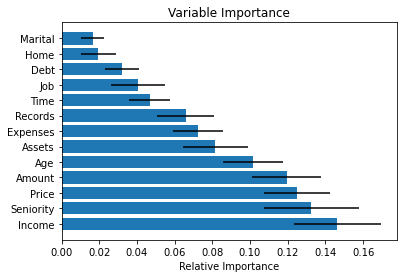

In [30]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train2b, y_train2b)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = data.columns[:-1]
print(features[sorted_idx])
padding = np.arange(X_train2b.size/len(X_train2b)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

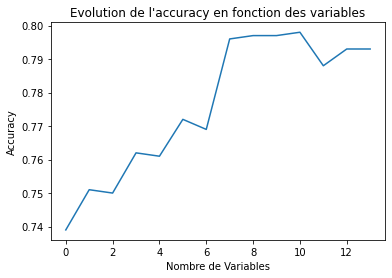

In [31]:
scores=np.zeros(X_train2b.shape[1]+1)
for f in np.arange(0, X_train2b.shape[1]+1):
    X1_f = X_train2b[:,sorted_idx[:f+1]]
    X2_f = X_test2b[:,sorted_idx[:f+1]]
    mlpc2b.fit(X1_f,y_train2b)
    Ymlp=mlpc2b.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test2b,Ymlp),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [32]:
print(f"L'accuracy optimale est atteinte lorsque nous avons {np.argmax(scores)} variables")

L'accuracy optimale est atteinte lorsque nous avons 10 variables


In [33]:
X_train = X_train2b[:,sorted_idx[:10]]
X_test = X_test2b[:,sorted_idx[:10]]

In [34]:
# Question 6 : paramétrage des classifieurs

In [35]:
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (40, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [36]:
parameters = {'activation':['identity', 'logistic','tanh', 'relu'], 'hidden_layer_sizes':[(10,10),(20,10),(30,10),(40,10),(50,10)]}

mlp_Grid = GridSearchCV(mlpc,parameters, verbose=3,cv = 5).fit(X_train, y_train2b)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(10, 10);, score=0.795 total time=   1.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10, 10);, score=0.799 total time=   0.7s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10, 10);, score=0.773 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10, 10);, score=0.792 total time=   0.8s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10, 10);, score=0.755 total time=   0.6s
[CV 1/5] END activation=identity, hidden_layer_sizes=(20, 10);, score=0.792 total time=   1.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(20, 10);, score=0.795 total time=   1.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(20, 10);, score=0.769 total time=   0.8s
[CV 4/5] END activation=identity, hidden_layer_sizes=(20, 10);, score=0.792 total time=   1.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(20, 10);, score=0.760 total t

In [37]:
mlp_Grid.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (10, 10)}

Nos meilleurs paramètres sont 'tanh' et '(10,10)'

In [43]:
cv_results = pd.DataFrame(mlp_Grid.cv_results_)
mean_test_score = cv_results.loc[np.where(cv_results["param_activation"] == "tanh")[0], "mean_test_score"]

Text(0, 0.5, 'Accuracy')

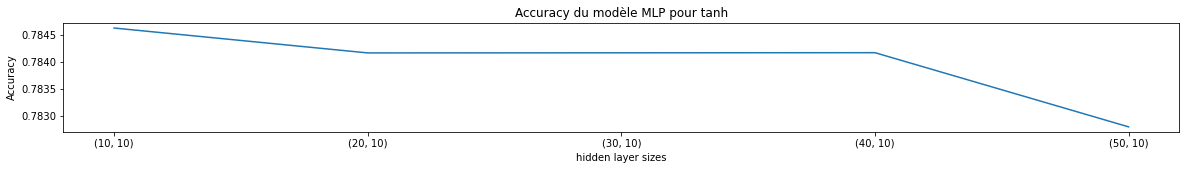

In [44]:
plt.figure(figsize = (20,2))
plt.plot([str(e) for e in list(parameters["hidden_layer_sizes"])], mean_test_score)
_ = plt.title("Accuracy du modèle MLP pour tanh")
plt.xlabel("hidden layer sizes")
plt.ylabel("Accuracy")

In [40]:
# Question 7 : pipeline

In [46]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('mlp', MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50,10)))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.796617915904936

Sauvegarde de la pipeline dans un joblib :

In [47]:
import joblib
jl = joblib.dump(pipe,"Pipeline.joblib")

In [48]:
jl1 = joblib.load("Pipeline.joblib")
jl1.score(X_test, y_test)

0.796617915904936

Sauvegarde de la pipeline dans un pickle :

In [50]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe, file)

In [52]:
with open(pkl_filename, 'rb') as file:
    pk = pickle.load(file)

pk.score(X_test, y_test)

0.796617915904936

In [ ]:
# Question 8

In [54]:
def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits = 10, shuffle = True, random_state = 0)
    scores = {"accuracy": "accuracy", "auc": "roc_auc", "precision": "precision"}
    for i in clfs:
        clf = clfs[i]
        cv_scores = cross_validate(clf, X, Y, cv = kf, scoring = scores)
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_scores["test_accuracy"]), np.std(cv_scores["test_accuracy"])))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_scores["test_auc"]), np.std(cv_scores["test_auc"])))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_scores["test_precision"]), np.std(cv_scores["test_precision"])))
        print("Execution time for {0} is: {1:.3f} +/- {2:.3f}\n".format(i, np.mean(cv_scores["fit_time"]), np.std(cv_scores["fit_time"])))

In [53]:
clfs = {
    'NBS': GaussianNB(),
    'CART': DecisionTreeClassifier(criterion = "gini", random_state = 1),
    'ID3': DecisionTreeClassifier(criterion = "entropy", random_state = 1),
    'DS': DecisionTreeClassifier(max_depth = 1, random_state = 1),
    'MLP': MLPClassifier(hidden_layer_sizes = (20, 10), random_state = 1),
    'KNN': KNeighborsClassifier(n_neighbors = 5),
    'BAG': BaggingClassifier(n_estimators = 200, random_state = 1),
    'ADA': AdaBoostClassifier(n_estimators = 200),
    'RF': RandomForestClassifier(n_estimators = 200, random_state = 1),
    'SVC': SVC()
}

In [56]:
run_classifiers(clfs, X_train, y_train2)

Accuracy for NBS is: 0.756 +/- 0.026
AUC for NBS is: 0.785 +/- 0.032
Precision for NBS is: 0.814 +/- 0.035
Execution time for NBS is: 0.003 +/- 0.001

Accuracy for CART is: 0.699 +/- 0.026
AUC for CART is: 0.628 +/- 0.034
Precision for CART is: 0.792 +/- 0.034
Execution time for CART is: 0.018 +/- 0.000

Accuracy for ID3 is: 0.707 +/- 0.029
AUC for ID3 is: 0.634 +/- 0.033
Precision for ID3 is: 0.795 +/- 0.035
Execution time for ID3 is: 0.021 +/- 0.004

Accuracy for DS is: 0.721 +/- 0.028
AUC for DS is: 0.617 +/- 0.034
Precision for DS is: 0.736 +/- 0.030
Execution time for DS is: 0.002 +/- 0.000

Accuracy for MLP is: 0.783 +/- 0.026
AUC for MLP is: 0.822 +/- 0.029
Precision for MLP is: 0.817 +/- 0.034
Execution time for MLP is: 1.525 +/- 0.010

Accuracy for KNN is: 0.749 +/- 0.024
AUC for KNN is: 0.740 +/- 0.023
Precision for KNN is: 0.800 +/- 0.029
Execution time for KNN is: 0.003 +/- 0.000

Accuracy for BAG is: 0.759 +/- 0.021
AUC for BAG is: 0.798 +/- 0.024
Precision for BAG is: 0.8

Notre modèle le plus performant est le modèle MLP.
Mais il est aussi le modèle qui prend le plus de temps pour s'exécuter.

On pourrait aussi garder comme meilleur modèle ADA boosting car son score est proche du MLP mais son temps d'execution est bien plus intéressant.